In [11]:
import os
os.chdir(r'C:\Users\PC\Desktop\data\따릉이')


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [54]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('submission.csv')

---
### 데이터확인

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [18]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [27]:
train.corr()
# abs(bostonDf.corr().medv).sort_values(ascending=False)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


---
- id 고유 id
- hour 시간 #데이터를 보니 시간에 따른 대여량의 차이가 크다
- temperature 기온
- precipitation 비가 오지 않았으면 0, 비가 오면 1
- windspeed 풍속(평균)
- humidity 습도
- visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- ozone 오존
- pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count 시간에 따른 따릉이 대여 수


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [55]:
# 3가지가 관계가 없으므로 날린다.
train=train.drop(['hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5'],axis=1)
test=test.drop(['hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5'],axis=1)


In [ ]:
train.fillna(0,inplace = True)
test.fillna(0,inplace = True)

#결측값을 위에서 아래 방향으로 채우기 (forward filling) 어떤 기준으로 채움?
#결측치가 있는 행만 보고 싶다면? 
#다양한 결측치가 있는행만 보고 싶다면

In [75]:
# train.columns[:-1]
# targetDF = df[df.columns[-1]]
# train.drop([934,1035],axis=0,inplace=True)
# test.loc[test['child_num']>=2, 'child_num']=2
# train.columns['hour_bef_temperature','hour_bef_windspeed']

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility'],
      dtype='object')

In [77]:
train[train['hour_bef_windspeed'].isnull()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,count
18,33,13,22.6,0.0,NaN,41.0,987.0,208.0
244,381,1,14.1,0.0,NaN,55.0,1992.0,38.0
260,404,3,14.0,0.0,NaN,50.0,2000.0,17.0
376,570,0,14.3,0.0,NaN,49.0,2000.0,58.0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,181.0
934,1420,0,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,116.0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,20.0


In [81]:
train.drop(train[train['hour_bef_windspeed'].isnull()].index,inplace=True)
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
count                     0
dtype: int64

In [86]:
test.drop(test[test['hour_bef_temperature'].isnull()].index,inplace=True)
test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
dtype: int64

In [80]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      2
hour_bef_precipitation    2
hour_bef_windspeed        9
hour_bef_humidity         2
hour_bef_visibility       2
count                     0
dtype: int64

In [56]:
test.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      1
hour_bef_precipitation    1
hour_bef_windspeed        1
hour_bef_humidity         1
hour_bef_visibility       1
dtype: int64

Text(0, 0.5, '대여량')

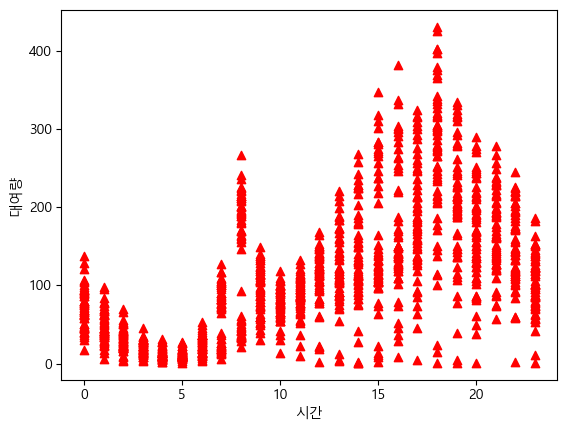

In [49]:
plt.scatter(train.hour,train[train.columns[-1]],marker='^',color='red')
plt.xlabel('시간')
plt.ylabel('대여량')

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [93]:
train_x = train.drop(['count'],axis = 1)
train_y = train['count']


In [94]:
x_train, x_test, y_train, y_test = train_test_split(train_x,train_y,random_state=31,test_size=0.2)

In [95]:
model = KNeighborsClassifier()
params = {'n_neighbors':[2,3,4,5],'p':[1,2,3]}
grid = GridSearchCV(model,param_grid=params,cv=3,scoring='accuracy')
grid.fit(x_train,y_train)

C:\Users\PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5], 'p': [1, 2, 3]},
             scoring='accuracy')

In [96]:
grid.best_params_

{'n_neighbors': 5, 'p': 2}

In [97]:
grid.best_score_

0.014653706604544054

In [98]:
grid_model = grid.best_estimator_

In [99]:
y_pre = grid_model.predict(x_test)

In [101]:
accuracy_score(y_pre,y_test)
#폭망했네...

0.010344827586206896